# I] Import and options


In [15]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# # this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [16]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

## A) Extracellular Acidification Rate 

In [17]:
%%time
data = "ecar_exp1_df_", "ecar_exp2_df_", "ecar_exp3_df_"
all_conditions = "dmso", "baf"

ecar_exps = []
for condition in all_conditions:
    for file in data: 
        #download data
        path = output_file_directory + "ATG7/Seahorse_results/seahorse_ECAR/"+file +condition +".csv"
        df = pandas.read_csv(path, sep = ",")
        #create normalized columns and rename
        df = df.assign(EV_dox_ctl= df['Empty Vector +dox']/ df['Empty Vector -dox'],
                       ATG7_1norm= df['ATG7(1)']/ df['Empty Vector +dox'],
                       ATG7_2norm= df['ATG7(2)']/ df['Empty Vector +dox'])
        df = df.iloc[:,6:] #select the 3 normalized columns
        df = df.rename(columns = {'EV_dox_ctl' : 'MEF dox control', 
                                  'ATG7_1norm' : 'ATG7(1)',
                                  'ATG7_2norm' : 'ATG7(2)'})
        ecar_exps.append(df)

ecar_dmso_exp = pandas.concat([ecar_exps[0], ecar_exps[1], ecar_exps[2]], axis=0)
ecar_baf_exp = pandas.concat([ecar_exps[3], ecar_exps[4], ecar_exps[5]], axis=0)
print(ecar_dmso_exp, '\n', ecar_baf_exp)

   MEF dox control   ATG7(1)   ATG7(2)
0         1.152281  1.346141  0.904119
1         1.171588  1.343781  1.043421
2         1.223190  1.333029  1.045764
0         1.012290  0.997847  0.576276
1         0.948806  1.055864  0.597071
2         0.937743  1.054395  0.592903
0         1.427226  1.446510  0.823793
1         1.826333  1.364167  0.665330
2         1.970113  1.357555  0.711864 
    MEF dox control   ATG7(1)   ATG7(2)
0         1.023740  1.189939  0.711381
1         1.009665  1.237981  0.698163
2         0.974126  1.309724  0.703404
0         1.012290  0.997847  0.576276
1         0.948806  1.055864  0.597071
2         0.937743  1.054395  0.592903
0         1.256930  0.933618  0.651319
1         1.329504  0.941970  0.684557
2         1.324646  0.900535  0.674361
Wall time: 32.9 ms


the pvalue between ATG7(1) and ATG7(2) with DMSO is 3.961E-04
the pvalue between ATG7(1) and ATG7(2) with BAF is 2.061E-04


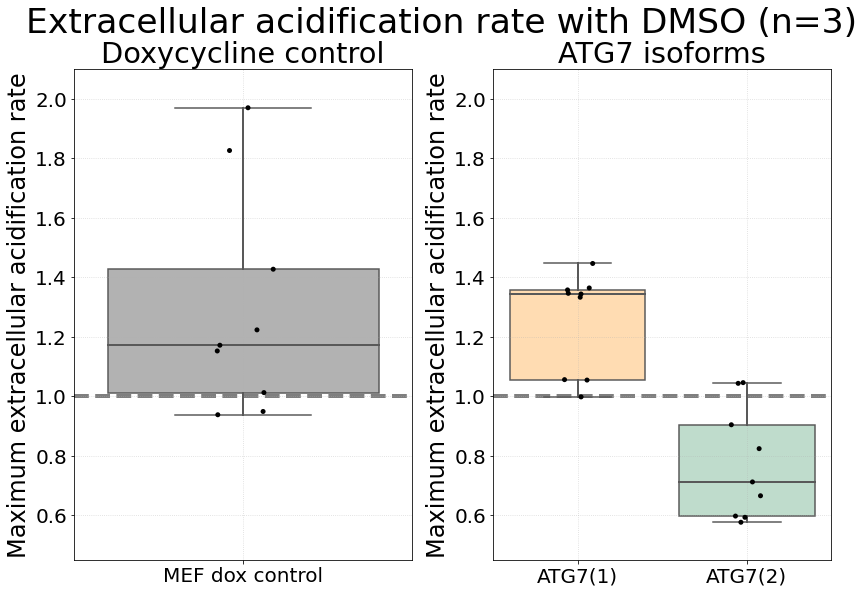

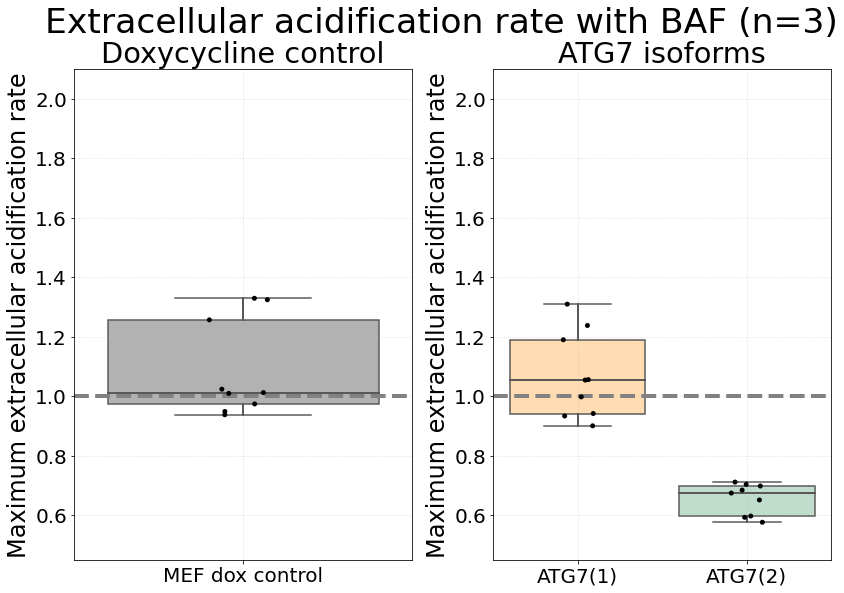

In [28]:
dfs = [ecar_dmso_exp, ecar_baf_exp]
infos = ['DMSO', 'BAF']
targets_tocomp = [['MEF dox control', 'ATG7(1)', 'ATG7(2)']]

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    for target in targets_tocomp:
        controls = target[0]
        iso1 = target[1]
        iso2 = target[2]
        
        # Mann-Whitney analysis 
        statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
        Pvalue = "{:.3E}".format(pvalue)
        print("the pvalue between ATG7(1) and ATG7(2) with", info,"is", Pvalue)

        
        #Figure with 2 graphs
        fig, ax = plt.subplots(1,2)
        plt.tight_layout()
        text_title = 'Extracellular acidification rate with '+ info+ ' (n=3)'
        fig.suptitle(text_title, y=1.05, fontsize="x-large")
 

        #graph for controls
        fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                              whiskerprops={'lw':2}, showcaps=True, showfliers=False)
        fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
        fig.set_title("Doxycycline control")
        fig.set_xlabel('')
        fig.set_ylabel('Maximum extracellular acidification rate')
        
        # Select which box you want to change    
        box_nodox = fig.artists[0]
        box_nodox.set_facecolor('black')

        # adding transparency to colors
        for patch in fig.artists:
             r, g, b, a = patch.get_facecolor()
             patch.set_facecolor((r, g, b, .3))
        
        fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
        fig.grid(alpha = 0.5, ls = ":")
        fig.set_ylim(0.45,2.1)
        
        
        
        #graph for ATG7(1) vs ATG7(2)
        fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                              whiskerprops={'lw':2}, showcaps=True, showfliers=False)
        fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
        fig.set_title("ATG7 isoforms")
        fig.set_xlabel('')
        fig.set_ylabel('Maximum extracellular acidification rate')
 
        # Select which box you want to change    
        box_iso1 = fig.artists[0]
        box_iso1.set_facecolor('darkorange')
        box_iso2 = fig.artists[1]
        box_iso2.set_facecolor('seagreen')
        
        # adding transparency to colors
        for patch in fig.artists:
             r, g, b, a = patch.get_facecolor()
             patch.set_facecolor((r, g, b, .3))

        fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
        fig.grid(alpha = 0.5, ls = ":")
        fig.set_ylim(0.45,2.1)
                
#     # save
#     path = 'ATG7/Seahorse_results/seahorse_ECAR/'
#     text_file = 'graph_all_ecar_'+info
#     plt.savefig(output_file_directory+path+text_file+'.svg')
#     plt.show()
#     plt.clf()


## B) Oxygen Consumption Rate 

In [19]:
df

,MEF dox control,ATG7(1),ATG7(2)
0,1.023740,1.189939,0.711381
1,1.009665,1.237981,0.698163
2,0.974126,1.309724,0.703404
0,1.012290,0.997847,0.576276
1,0.948806,1.055864,0.597071
2,0.937743,1.054395,0.592903
0,1.256930,0.933618,0.651319
1,1.329504,0.941970,0.684557
2,1.324646,0.900535,0.674361


In [20]:
%%time
data = "ocr_exp2_df_", "ocr_exp7_df_", "ocr_exp12_df_", "ocr_exp13_df_"
all_conditions = "dmso", "baf"

ocr_exps = []

for condition in all_conditions:
    for file in data: 
        #download data
        path = output_file_directory + "ATG7/Seahorse_results/seahorse_OCR/"+file +condition +".csv"
        df = pandas.read_csv(path, sep = ",")
        #create normalized columns and rename
        
        df = df.assign(EV_dox_ctl= df['Empty Vector +dox']/ df['Empty Vector -dox'],
                       ATG7_1norm= df['ATG7(1)']/ df['Empty Vector +dox'],
                       ATG7_2norm= df['ATG7(2)']/ df['Empty Vector +dox'])
        df = df.iloc[:,5:] #select the 3 normalized columns
        df = df.rename(columns = {'EV_dox_ctl' : 'MEF dox control', 
                                  'ATG7_1norm' : 'ATG7(1)',
                                  'ATG7_2norm' : 'ATG7(2)'})
        ocr_exps.append(df)

ocr_dmso_exp = pandas.concat([ocr_exps[0], ocr_exps[1], ocr_exps[2], ocr_exps[3]], axis=0)
ocr_baf_exp = pandas.concat([ocr_exps[4], ocr_exps[5], ocr_exps[6], ocr_exps[7]], axis=0)
print(ocr_dmso_exp, '\n', ocr_baf_exp)

   MEF dox control   ATG7(1)   ATG7(2)
0         0.717989  1.614099  1.375309
1         0.842324  1.777499  1.484735
2         0.889000  1.925270  1.484642
0         1.278354  1.128905  0.511328
1         1.391229  1.156366  0.517622
2         1.362423  1.150214  0.513062
0         1.214542  1.116841  0.873952
1         1.273335  1.089108  0.848306
2         1.289946  1.100030  0.872564
0         0.919651  1.128639  0.815976
1         0.933438  1.163735  0.832812
2         0.931717  1.146797  0.822907 
    MEF dox control   ATG7(1)   ATG7(2)
0         0.683971  1.615872  0.746534
1         0.764661  1.261050  0.804043
2         0.782592  1.234342  0.861181
0         0.952371  1.441210  0.798992
1         0.967863  1.432946  0.788134
2         0.954733  1.427871  0.797774
0         1.037428  1.455943  0.682703
1         1.028360  1.478245  0.702154
2         1.017984  1.487554  0.745073
0         1.004522  0.991942  0.688002
1         1.001072  0.961512  0.712164
2         1.028219  0.9

the pvalue between ATG7(1) and ATG7(2) with DMSO is 5.097E-03


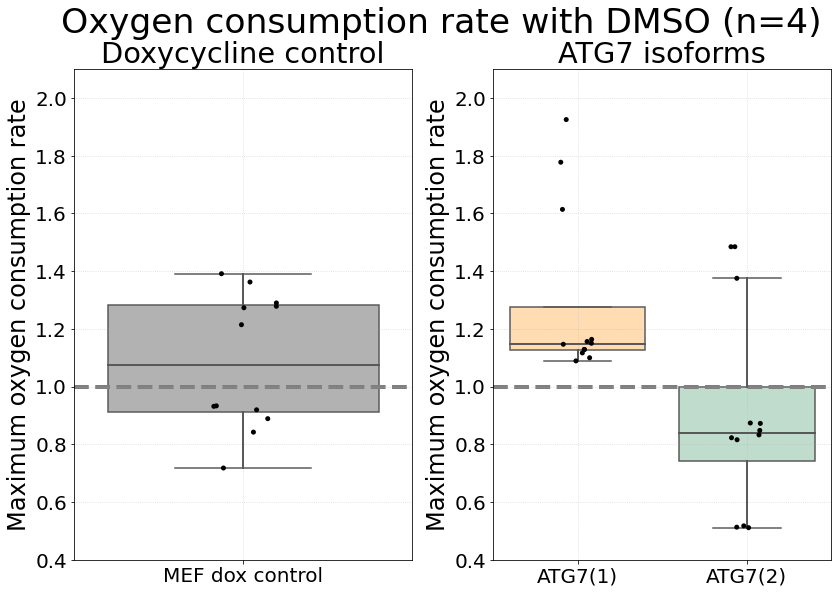

the pvalue between ATG7(1) and ATG7(2) with BAF is 1.829E-05


<Figure size 864x576 with 0 Axes>

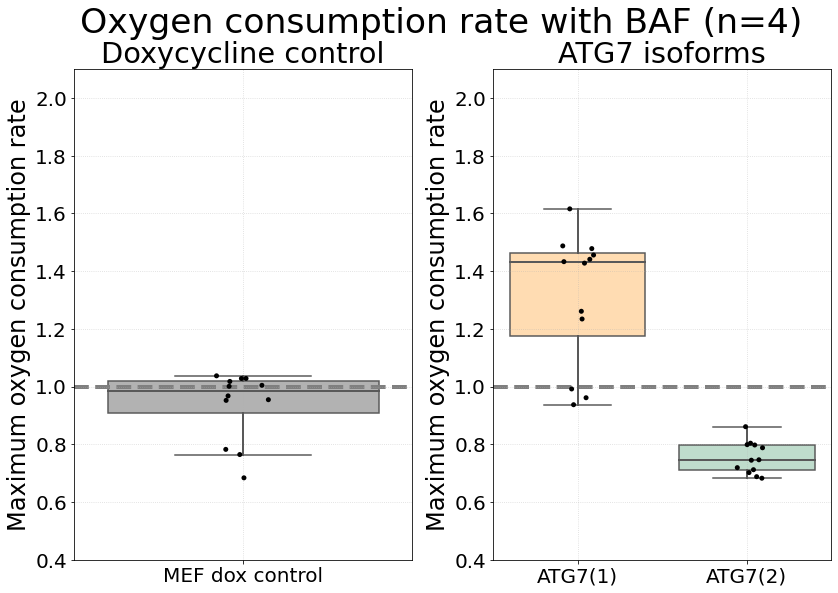

<Figure size 864x576 with 0 Axes>

In [26]:
dfs = [ocr_dmso_exp, ocr_baf_exp]
infos = ['DMSO', 'BAF']
targets_tocomp = [['MEF dox control', 'ATG7(1)', 'ATG7(2)']]

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    for target in targets_tocomp:
        controls = target[0]
        iso1 = target[1]
        iso2 = target[2]
        
        # Mann-Whitney analysis 
        statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
        Pvalue = "{:.3E}".format(pvalue)
        print("the pvalue between ATG7(1) and ATG7(2) with", info,"is", Pvalue)
  
        #Figure with 2 graphs
        fig, ax = plt.subplots(1,2)
        plt.tight_layout()
        text_title = 'Oxygen consumption rate with '+ info+ ' (n=4)'
        fig.suptitle(text_title, y=1.05, fontsize="x-large")
        
        #graph for controls
        fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                              whiskerprops={'lw':2}, showcaps=True, showfliers=False)
        fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
        fig.set_title("Doxycycline control")
        fig.set_xlabel('')
        fig.set_ylabel('Maximum oxygen consumption rate')
        
        # Select which box you want to change    
        box_nodox = fig.artists[0]
        box_nodox.set_facecolor('black')

        # adding transparency to colors
        for patch in fig.artists:
             r, g, b, a = patch.get_facecolor()
             patch.set_facecolor((r, g, b, .3))
        
        fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
        fig.grid(alpha = 0.5, ls = ":")
        fig.set_ylim(0.4,2.1)
        
        
        #graph for ATG7(1) vs ATG7(2)
        fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                              whiskerprops={'lw':2}, showcaps=True, showfliers=False)
        fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
        fig.set_title("ATG7 isoforms")
        fig.set_xlabel('')
        fig.set_ylabel('Maximum oxygen consumption rate')
 
        # Select which box you want to change    
        box_iso1 = fig.artists[0]
        box_iso1.set_facecolor('darkorange')
        box_iso2 = fig.artists[1]
        box_iso2.set_facecolor('seagreen')
        
        # adding transparency to colors
        for patch in fig.artists:
             r, g, b, a = patch.get_facecolor()
             patch.set_facecolor((r, g, b, .3))

        fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
        fig.grid(alpha = 0.5, ls = ":")
        fig.set_ylim(0.4,2.1)
                
    # save
    path = 'ATG7/Seahorse_results/seahorse_OCR/'
    text_file = 'graph_all_ecar_'+info
    plt.savefig(output_file_directory+path+text_file+'.svg')
    plt.show()
    plt.clf()
